# Cyclistic, come può un sistema di bikesharing raggiungere rapidamente il successo?

**Guidare la strategia marketing attraverso i dati.**

## 4. Analisi Esplorativa dei Dati (EDA)
In questo notebook, ci immergeremo nell'analisi esplorativa dei dati (EDA) del nostro dataset Divvy pulito e preparato. A differenza del notebook precedente, che si è focalizzato sulla pulizia e l'elaborazioni, qui il l'obiettivo è scoprire insight significativi.

Per iniziare, carico il DataFrame pulito che ho salvato nel file divvy_clean.parquet. 

In questa fase ho integrato la visualizzazione dei dati per esplorare le abitudini di viaggio, le durate delle corse, le preferenze orarie e le differenze tra giorni feriali e weekend. Lo scopo è identificare pattern e trend che possano aiutarmi a comprendere meglio il comportamento degli utenti del servizio di bike sharing.

**Importazione pacchetti e librerie**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Importazione DataFrame**

In [6]:
divvy = pd.read_parquet('divvy_clean.parquet')
print("Caricamento ok!")

Caricamento ok!


**Anteprima DataFrame**

In [7]:
divvy.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,month,weekday,hour,day_type,ride_duration,time_of_day,ride_duration_category
0,C1D650626C8C899A,electric_bike,2024-01-12 15:30:27,2024-01-12 15:37:59,Wells St & Elm St,Kingsbury St & Kinzie St,41.903267,-87.634737,41.889177,-87.638506,member,1,Ven,15,Feriale,7,Pomeriggio,Medie (6-15 min)
1,EECD38BDB25BFCB0,electric_bike,2024-01-08 15:45:46,2024-01-08 15:52:59,Wells St & Elm St,Kingsbury St & Kinzie St,41.902937,-87.634440,41.889177,-87.638506,member,1,Lun,15,Feriale,7,Pomeriggio,Medie (6-15 min)
2,F4A9CE78061F17F7,electric_bike,2024-01-27 12:27:19,2024-01-27 12:35:19,Wells St & Elm St,Kingsbury St & Kinzie St,41.902951,-87.634470,41.889177,-87.638506,member,1,Sab,12,Weekend,8,Pomeriggio,Medie (6-15 min)
3,0A0D9E15EE50B171,classic_bike,2024-01-29 16:26:17,2024-01-29 16:56:06,Wells St & Randolph St,Larrabee St & Webster Ave,41.884295,-87.633963,41.921822,-87.644140,member,1,Lun,16,Feriale,29,Pomeriggio,Lunghe (16-30 min)
4,33FFC9805E3EFF9A,classic_bike,2024-01-31 05:43:23,2024-01-31 06:09:35,Lincoln Ave & Waveland Ave,Kingsbury St & Kinzie St,41.948797,-87.675278,41.889177,-87.638506,member,1,Mer,5,Feriale,26,Notte,Lunghe (16-30 min)


Indice delle analisi:

**4.1 Analisi utenti**


- _Composizione corse_: riportare la percentuale di corse effettuate per tipologia di utente;

- _Durata Media Corse_: confrontare la durata media delle corse per member e casual per indentificare le differenze principali nel loro comportamento di utilizzo del servizio.

**4.2 Analisi Temporale**


- **Distribuzione delle corse**: analisi della distribuzione delle corse nel tempo, confrontandole con i due tipi di utenti per:


   - Giorno della settimana (weekday).

   - Fascia oraria (hour o time_of_day).

   - Mese.

   
- **Distribuzione Durata Corse**: approfondisco come la durata delle corse cambia nel tempo per:

   - Giorno della settimana.

   - Fascia oraria.


**4.3 Analisi Geografica e di Prodotto**

- _Stazioni più frequentate_: identifico le stazioni di partenza e arrivo più popolari, separandole per member e casual. 

- _Tipologia di mezzo_: analizza la distribuzione e la durata delle corse in base al tipo di mezzo utilizzato.

**4.4 Analisi sui costi e sul risparmio per i piani abbonamento**
- _Analisi del costo_ per singola corsa per gli utenti casual
- _Analisi del confronto_ tra tariffe

### 4.1 Analisi utenti

**Qual è la percentuale di corse per utenti `member`e `casual`?**

In [8]:
# Calcola il numero totale di viaggi per ogni tipo di utente
member = len(divvy[divvy["member_casual"] == "member"])
casual = len(divvy[divvy["member_casual"] == "casual"])

# Calcola e stampa la percentuale di viaggi per ogni tipo di utente
print(f"La percentuale di viaggi per utente member: {member/ len(divvy)*100:.2f}%.")
print(f"La percentuale di viaggi per utente casual: {casual/ len(divvy)*100:.2f}%.")


La percentuale di viaggi per utente member: 63.91%.
La percentuale di viaggi per utente casual: 36.09%.


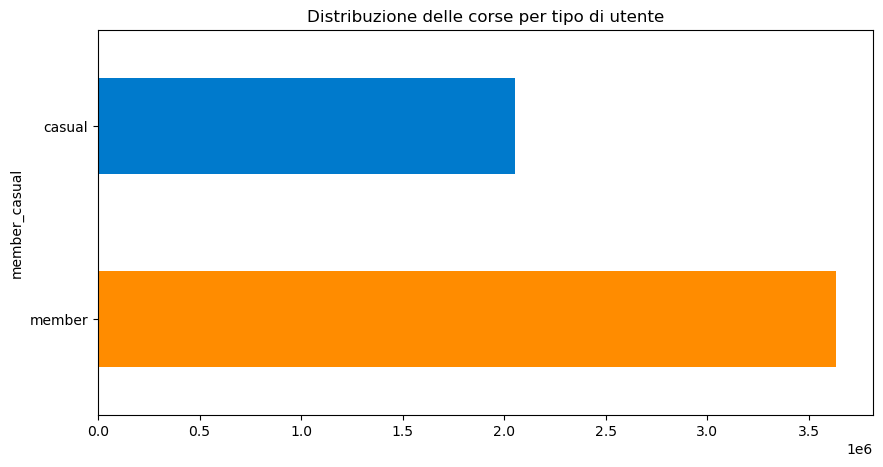

In [9]:
# Calcola il numero di utenti per ogni categoria
user_counts = divvy['member_casual'].value_counts()

# Crea il grafico a barre orizzontali
user_counts.plot(
    kind='barh',
    figsize=(10, 5),
    color=['#FF8C00', '#007ACC'],
    title="Distribuzione delle corse per tipo di utente"
)

plt.show()

**Qual è la durata media di corsa per utente `member`e `casual`?**

In [10]:
# Calcola la mediana della durata di corsa per tipo di utente

mediana_corse = divvy.groupby("member_casual")["ride_duration"].median()

print(f"Mediana della durata di corsa per gli utenti 'casual': {mediana_corse['casual']}")
print(f"Mediana della durata di corsa per gli utenti 'member': {mediana_corse['member']}")

Mediana della durata di corsa per gli utenti 'casual': 12.0
Mediana della durata di corsa per gli utenti 'member': 8.0


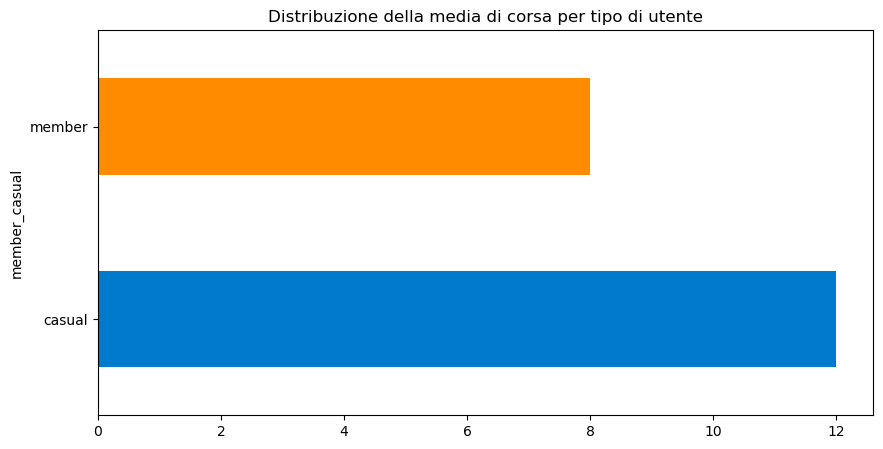

In [7]:
# Crea il grafico a barre orizzontali
mediana_corse.plot(
    kind='barh',
    figsize=(10, 5),
    color=['#007ACC', '#FF8C00'],
    title="Distribuzione della media di corsa per tipo di utente"
)

plt.show()

### 4.2 Analisi temporali

#### 4.2.1 **Distribuzione corse giorni settimana**

In [11]:
# 1. Definisci l'ordine dei giorni della settimana
giorni_ordinati = ['Lun', 'Mar', 'Mer', 'Gio', 'Ven', 'Sab', 'Dom']

# 2. Converti la colonna 'weekday' in una categoria ordinata
divvy['weekday'] = pd.Categorical(divvy['weekday'], categories=giorni_ordinati, ordered=True)

#creazione tabella pivot
distribuzione_numero_corse = divvy.pivot_table(
    values="ride_id",
    index="weekday",
    columns="member_casual",
    aggfunc="count",
    observed=True
)

print(distribuzione_numero_corse)

member_casual  casual  member
weekday                      
Lun            242777  524718
Mar            223201  559862
Mer            257905  598394
Gio            253836  559924
Ven            301451  515185
Sab            422588  468372
Dom            350805  407968


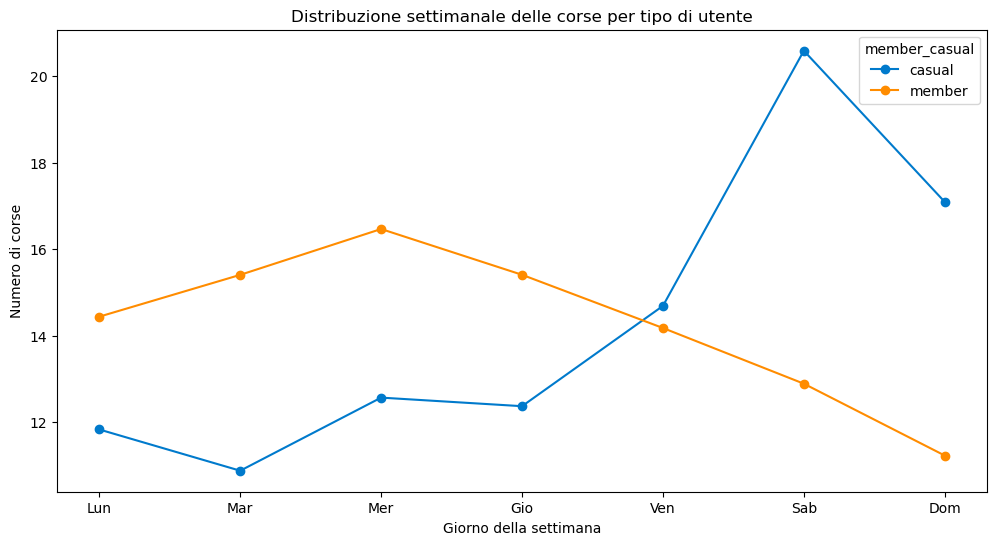

In [9]:
# Calcola le percentuali per ogni colonna (axis=0)
distribuzione_percentuale = distribuzione_numero_corse.apply(lambda x: x / x.sum() * 100, axis=0)

# Genera il grafico a linee direttamente dalla pivot table
distribuzione_percentuale.plot(
    kind='line',
    figsize=(12, 6),
    color=['#007ACC', '#FF8C00'],
    marker='o'
)

# Aggiungi titolo ed etichette
plt.title('Distribuzione settimanale delle corse per tipo di utente')
plt.xlabel('Giorno della settimana')
plt.ylabel('Numero di corse')

# Mostra il grafico

plt.show()

#### 4.2.2 **Distribuzione fascia oraria**

In [10]:
distribuzione_fascia_oraria = divvy.pivot_table(
    values="ride_id",
    index="time_of_day",
    columns="member_casual",
    aggfunc="count",
    observed=True
)

print(distribuzione_fascia_oraria)

member_casual  casual   member
time_of_day                   
Notte           95042   112227
Mattina        428682  1045535
Pomeriggio     965180  1571175
Sera           563659   905486


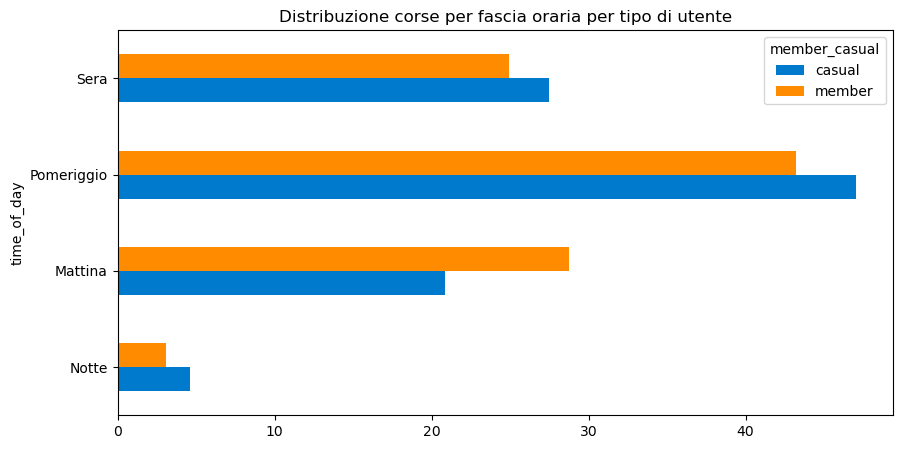

In [11]:
# Calcola le percentuali per ogni colonna (axis=0)
distribuzione_percentuale = distribuzione_fascia_oraria.apply(lambda x: x / x.sum() * 100, axis=0)

distribuzione_percentuale.plot(
    kind="barh",
    figsize=(10,5),
    color=['#007ACC', '#FF8C00'],
    title="Distribuzione corse per fascia oraria per tipo di utente"
)

plt.show()

#### 4.2.3 **Distribuzione per mese**

In [12]:
distribuzione_mese = divvy.pivot_table(
    values="ride_id",
    index="month",
    columns="member_casual",
    aggfunc="count",
    observed=True
)

print(distribuzione_mese)

member_casual  casual  member
month                        
1               23454  116079
2               45551  172342
3               79421  214033
4              125867  276288
5              219382  369259
6              285469  401307
7              304615  421087
8              303164  429485
9              330817  464923
10             207734  394072
11              89938  238352
12              37151  137196


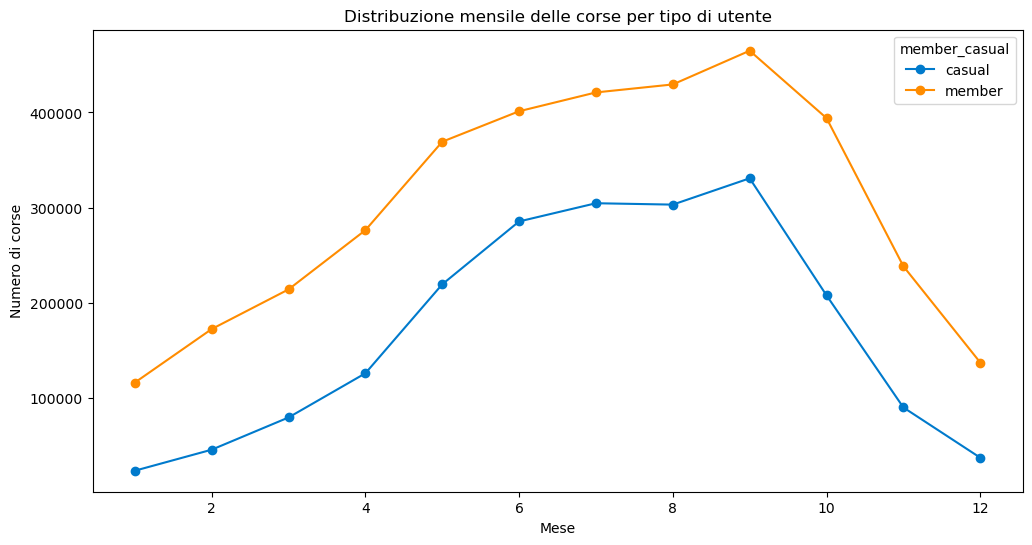

In [13]:
# Calcola le percentuali per ogni colonna (axis=0)
distribuzione_percentuale = distribuzione_mese.apply(lambda x: x / x.sum() * 100, axis=0)

# Genera il grafico a linee direttamente dalla pivot table
distribuzione_mese.plot(
    kind='line',
    figsize=(12, 6),
    color=['#007ACC', '#FF8C00'],
    marker='o'
)

# Aggiungi titolo ed etichette
plt.title('Distribuzione mensile delle corse per tipo di utente')
plt.xlabel('Mese')
plt.ylabel('Numero di corse')

# Mostra il grafico
plt.show()

#### 4.2.4 **Durata corse per giorno della settimana**

In [14]:
durata_corse_settimana = divvy.pivot_table(
    values="ride_duration",
    index= "weekday",
    columns="member_casual",
    aggfunc="median",
    observed=True
)

print(durata_corse_settimana)

member_casual  casual  member
weekday                      
Lun              11.0     8.0
Mar              10.0     8.0
Mer              10.0     8.0
Gio              10.0     8.0
Ven              11.0     8.0
Sab              14.0     9.0
Dom              14.0     9.0


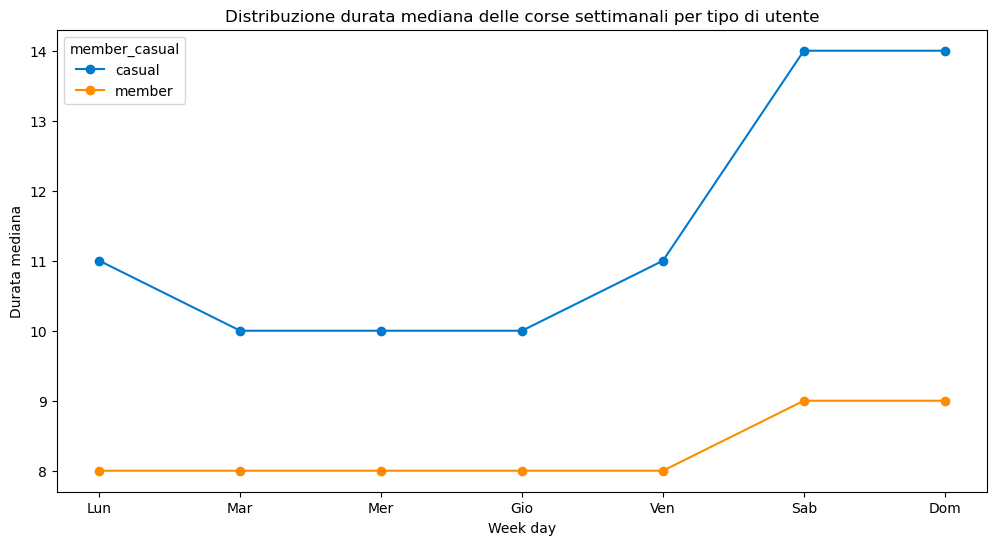

In [15]:
# Calcola le percentuali per ogni colonna (axis=0)
distribuzione_percentuale = durata_corse_settimana.apply(lambda x: x / x.sum() * 100, axis=0)

# Genera il grafico a linee direttamente dalla pivot table
durata_corse_settimana.plot(
    kind='line',
    figsize=(12, 6),
    color=['#007ACC', '#FF8C00'],
    marker='o'
)

# Aggiungi titolo ed etichette
plt.title('Distribuzione durata mediana delle corse settimanali per tipo di utente')
plt.xlabel('Week day')
plt.ylabel('Durata mediana')

# Mostra il grafico
plt.show()

#### 4.2.5 **Durata corse per fascia oraria**

In [16]:
durata_corse_oraria = divvy.pivot_table(
    values="ride_duration",
    index="time_of_day",
    columns="member_casual",
    aggfunc="median",
    observed=True
)

print(durata_corse_oraria)

member_casual  casual  member
time_of_day                  
Notte             9.0     7.0
Mattina          10.0     8.0
Pomeriggio       13.0     9.0
Sera             11.0     9.0


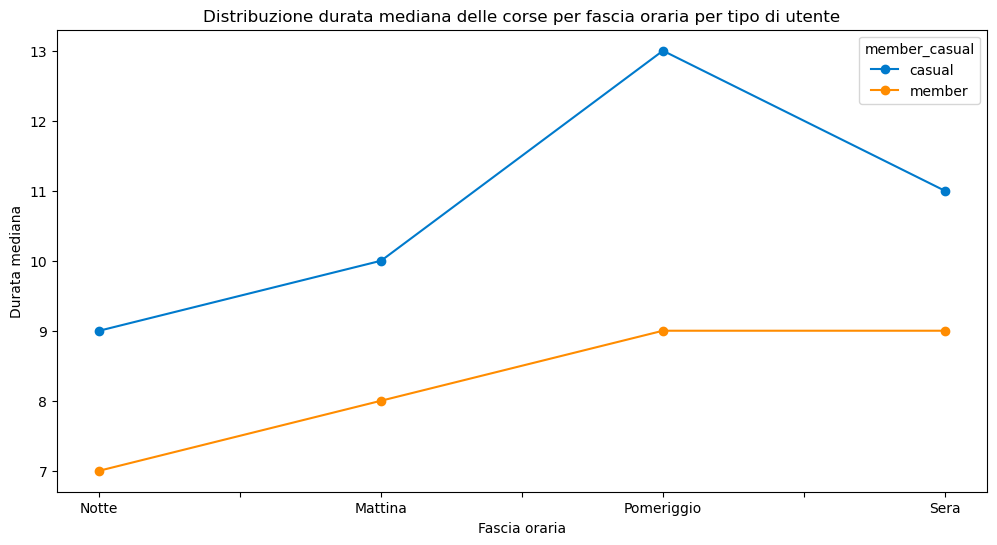

In [32]:
# Genera il grafico a linee direttamente dalla pivot table
durata_corse_oraria.plot(
    kind='line',
    figsize=(12, 6),
    color=['#007ACC', '#FF8C00'],
    marker='o'
)

# Aggiungi titolo ed etichette
plt.title('Distribuzione durata mediana delle corse per fascia oraria per tipo di utente')
plt.xlabel('Fascia oraria')
plt.ylabel('Durata mediana')

# Mostra il grafico
plt.show()

### 4.3 **Analisi geografica e di prodotto**

#### 4.3.1 **Stazioni di partenza più popolari**

In [18]:
# Filtra i dati per i soli membri e conta le stazioni di partenza
stazioni_member_partenza = divvy[divvy['member_casual'] == 'member']['start_station_name'].value_counts().head(10)

# Filtra i dati per i soli utenti casual e conta le stazioni di partenza
stazioni_casual_partenza = divvy[divvy['member_casual'] == 'casual']['start_station_name'].value_counts().head(10)

print("Le 10 stazioni di partenza più popolari per utenti member:")
print(stazioni_member_partenza)
print("\nLe 10 stazioni di partenza più popolari per utenti casual:")
print(stazioni_casual_partenza)

Le 10 stazioni di partenza più popolari per utenti member:
start_station_name
Wells St & Elm St                      37033
Broadway & Barry Ave                   29832
Kingsbury St & Kinzie St               29173
Clinton St & Washington Blvd           27388
University Ave & 57th St               27047
Desplaines St & Jackson Blvd           26103
Wells St & Randolph St                 25586
Orleans St & Merchandise Mart Plaza    25137
Sheridan Rd & Irving Park Rd           24648
Clinton St & Madison St                24520
Name: count, dtype: int64

Le 10 stazioni di partenza più popolari per utenti casual:
start_station_name
Streeter Dr & Grand Ave               49262
DuSable Lake Shore Dr & Monroe St     32715
Michigan Ave & Oak St                 31666
DuSable Lake Shore Dr & North Blvd    22326
Millennium Park                       21437
Theater on the Lake                   20727
Shedd Aquarium                        20454
Wells St & Elm St                     17873
Dusable Harbor 

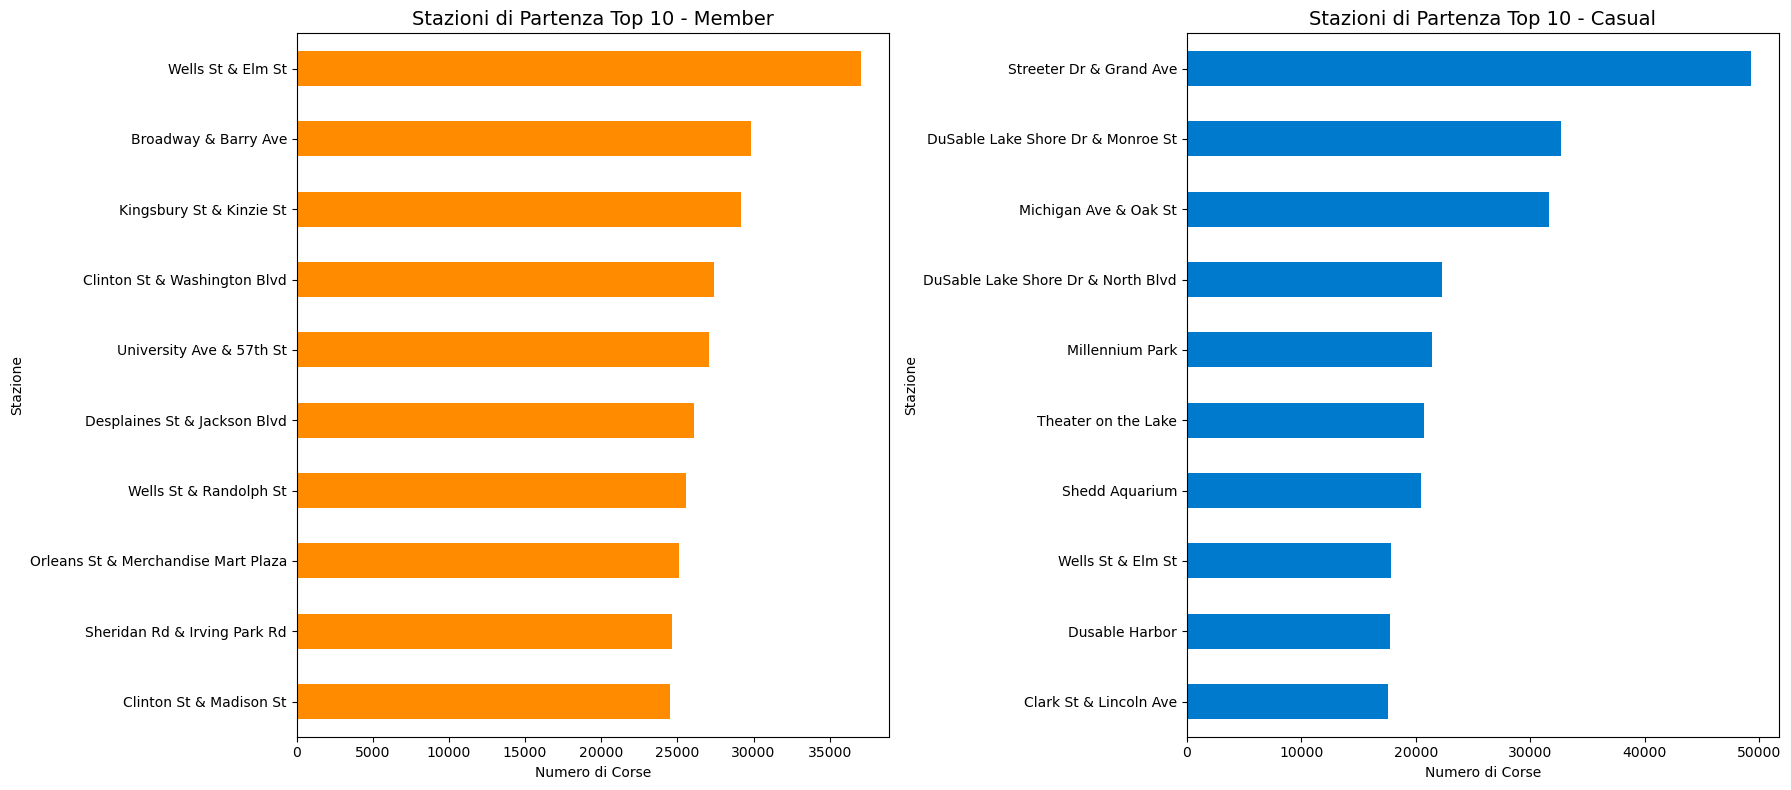

In [19]:
# Crea la figura e i due subplot affiancati
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

# Primo grafico: Stazioni per gli Utenti Member
stazioni_member_partenza.plot(kind='barh', ax=axes[0], color='#FF8C00')
axes[0].set_title('Stazioni di Partenza Top 10 - Member', fontsize=14)
axes[0].set_xlabel('Numero di Corse')
axes[0].set_ylabel('Stazione')
axes[0].invert_yaxis()  # Per avere la stazione più popolare in alto

# Secondo grafico: Stazioni per gli Utenti Casual
stazioni_casual_partenza.plot(kind='barh', ax=axes[1], color='#007ACC')
axes[1].set_title('Stazioni di Partenza Top 10 - Casual', fontsize=14)
axes[1].set_xlabel('Numero di Corse')
axes[1].set_ylabel('Stazione')
axes[1].invert_yaxis()  # Per avere la stazione più popolare in alto

plt.tight_layout()  # Ottimizza la spaziatura tra i grafici
plt.show()

#### **Mappa interativa delle stazioni di partenza più frequentate**

In [20]:
# Aggrega i dati per i membri
top_member_stations = divvy[divvy['member_casual'] == 'member'].groupby('start_station_name').agg(
    count=('ride_id', 'count'),
    lat=('start_lat', 'first'),
    lng=('start_lng', 'first')
).nlargest(10, 'count').reset_index()

# Aggrega i dati per gli utenti casual
top_casual_stations = divvy[divvy['member_casual'] == 'casual'].groupby('start_station_name').agg(
    count=('ride_id', 'count'),
    lat=('start_lat', 'first'),
    lng=('start_lng', 'first')
).nlargest(10, 'count').reset_index()

In [22]:
%pip install folium

Note: you may need to restart the kernel to use updated packages.


In [25]:
import folium

# Imposta le coordinate del centro della mappa (es. centro di Chicago, USA)
map_center = [41.8781, -87.6298]
m = folium.Map(location=map_center, zoom_start=12)

# Aggiungi un layer di marker per i Membri
for index, row in top_member_stations.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['lng']],
        radius=5,
        color='#FF8C00',  # Arancione per i membri
        fill=True,
        fill_color='#FF8C00',
        fill_opacity=0.7,
        tooltip=f"Member: {row['start_station_name']}<br>Corse: {row['count']}"
    ).add_to(m)

# Aggiungi un layer di marker per i Casual
for index, row in top_casual_stations.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['lng']],
        radius=5,
        color='#007ACC',  # Blu per i casual
        fill=True,
        fill_color='#007ACC',
        fill_opacity=0.7,
        tooltip=f"Casual: {row['start_station_name']}<br>Corse: {row['count']}"
    ).add_to(m)


# visualizzare
m

#### 4.3.2 **Stazioni di arrivo più popolari**

In [27]:
# Filtra i dati per i soli membri e conta le stazioni di partenza
stazioni_member_arrivo = divvy[divvy['member_casual'] == 'member']['end_station_name'].value_counts().head(10)

# Filtra i dati per i soli utenti casual e conta le stazioni di partenza
stazioni_casual_arrivo = divvy[divvy['member_casual'] == 'casual']['end_station_name'].value_counts().head(10)

print("Le 10 stazioni di arrivo più popolari per utenti member:")
print(stazioni_member_arrivo)
print("\nLe 10 stazioni di arrivo più popolari per utenti casual:")
print(stazioni_casual_arrivo)

Le 10 stazioni di arrivo più popolari per utenti member:
end_station_name
Kingsbury St & Kinzie St         40730
Wilton Ave & Belmont Ave         31648
Clark St & Lake St               30415
Clinton St & Washington Blvd     28202
Clark St & Schiller St           26601
Franklin St & Jackson Blvd       26227
Clark St & Drummond Pl           26122
Clinton St & Madison St          25777
Pine Grove Ave & Waveland Ave    25299
McClurg Ct & Erie St             24772
Name: count, dtype: int64

Le 10 stazioni di arrivo più popolari per utenti casual:
end_station_name
Streeter Dr & Grand Ave               52937
Michigan Ave & Oak St                 32772
DuSable Lake Shore Dr & Monroe St     30684
DuSable Lake Shore Dr & North Blvd    25959
Dusable Harbor                        24062
Millennium Park                       23320
Clark St & Lake St                    18968
Shedd Aquarium                        18538
Clark St & Schiller St                18149
Clark St & Lincoln Ave                1

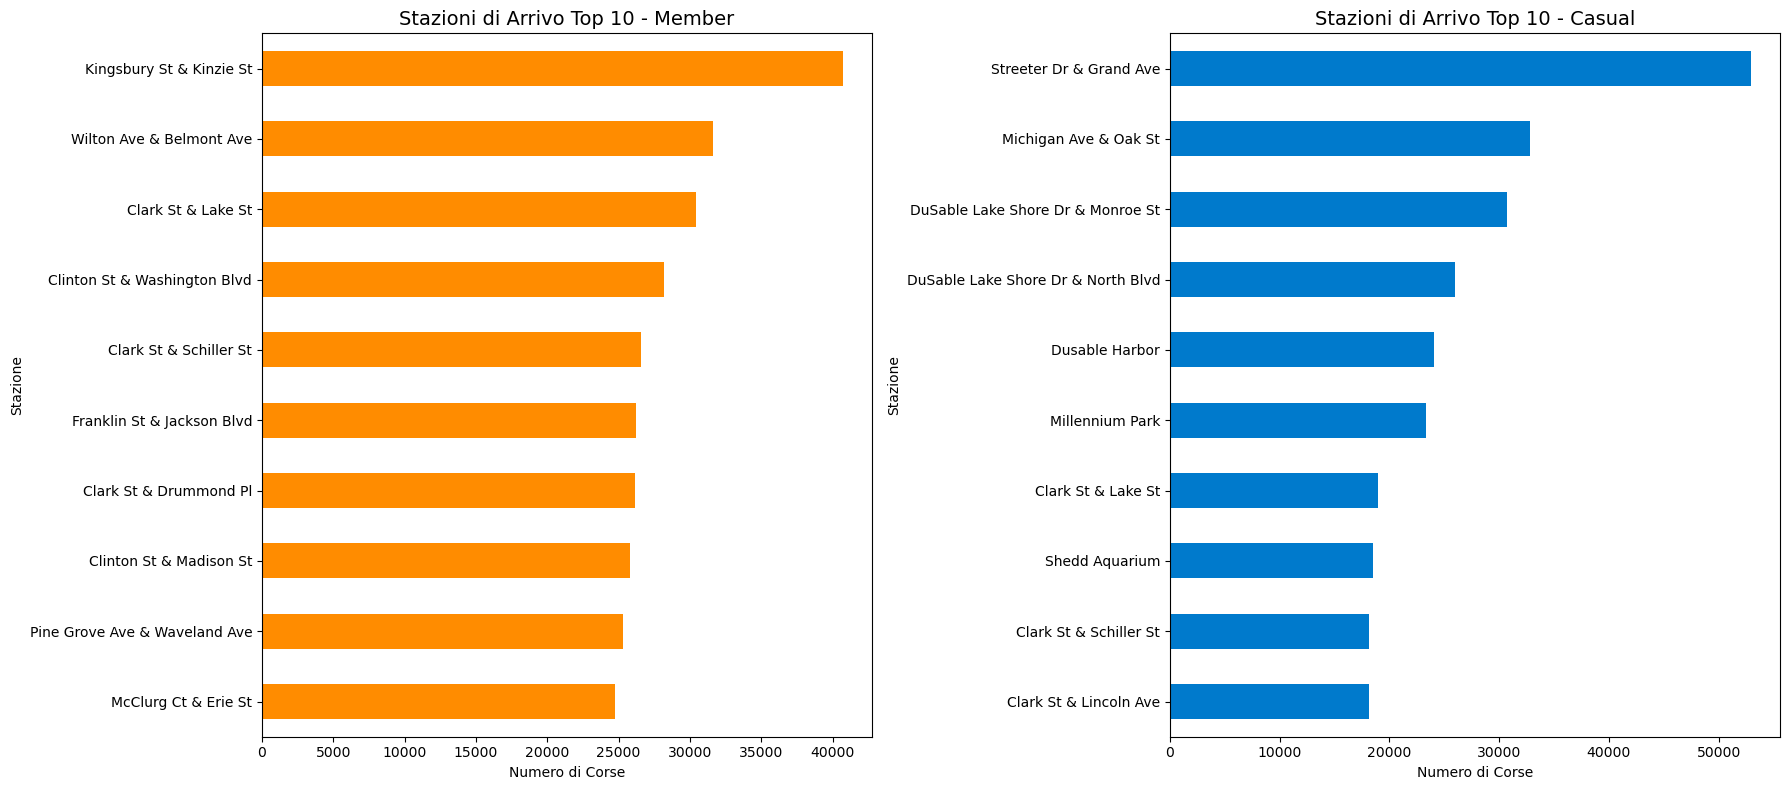

In [28]:
# Crea la figura e i due subplot affiancati
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

# Primo grafico: Stazioni per gli Utenti Member
stazioni_member_arrivo.plot(kind='barh', ax=axes[0], color='#FF8C00')
axes[0].set_title('Stazioni di Arrivo Top 10 - Member', fontsize=14)
axes[0].set_xlabel('Numero di Corse')
axes[0].set_ylabel('Stazione')
axes[0].invert_yaxis()  # Per avere la stazione più popolare in alto

# Secondo grafico: Stazioni per gli Utenti Casual
stazioni_casual_arrivo.plot(kind='barh', ax=axes[1], color='#007ACC')
axes[1].set_title('Stazioni di Arrivo Top 10 - Casual', fontsize=14)
axes[1].set_xlabel('Numero di Corse')
axes[1].set_ylabel('Stazione')
axes[1].invert_yaxis()  # Per avere la stazione più popolare in alto

plt.tight_layout()  # Ottimizza la spaziatura tra i grafici
plt.show()

#### **Mappa interattiva delle stazioni di arrivo più frequentate**

In [30]:
# Aggrega i dati per i membri
top_member_stations_arr = divvy[divvy['member_casual'] == 'member'].groupby('end_station_name').agg(
    count=('ride_id', 'count'),
    lat=('start_lat', 'first'),
    lng=('start_lng', 'first')
).nlargest(10, 'count').reset_index()

# Aggrega i dati per gli utenti casual
top_casual_stations_arr = divvy[divvy['member_casual'] == 'casual'].groupby('end_station_name').agg(
    count=('ride_id', 'count'),
    lat=('start_lat', 'first'),
    lng=('start_lng', 'first')
).nlargest(10, 'count').reset_index()

In [31]:
# Imposta le coordinate del centro della mappa (es. centro di Chicago, USA)
map_center = [41.8781, -87.6298]
m = folium.Map(location=map_center, zoom_start=12)

# Aggiungi un layer di marker per i Membri
for index, row in top_member_stations_arr.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['lng']],
        radius=5,
        color='#FF8C00',  # Arancione per i membri
        fill=True,
        fill_color='#FF8C00',
        fill_opacity=0.7,
        tooltip=f"Member: {row['end_station_name']}<br>Corse: {row['count']}"
    ).add_to(m)

# Aggiungi un layer di marker per i Casual
for index, row in top_casual_stations_arr.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['lng']],
        radius=5,
        color='#007ACC',  # Blu per i casual
        fill=True,
        fill_color='#007ACC',
        fill_opacity=0.7,
        tooltip=f"Casual: {row['end_station_name']}<br>Corse: {row['count']}"
    ).add_to(m)


# visualizzare
m

#### 4.3.3 **Analisi distribuzione mezzi di trasporto**

In [33]:
distribuzione_mezzi = divvy.pivot_table(
    values="ride_id",
    index="rideable_type",
    columns="member_casual",
    aggfunc="count",
    observed=True
)

# Calcola le percentuali per ogni colonna
distribuzione_percentuale = distribuzione_mezzi.apply(lambda x: x / x.sum() * 100, axis=0)

print(distribuzione_percentuale)

member_casual        casual     member
rideable_type                         
classic_bike      45.819056  48.056404
electric_bike     50.219603  50.399197
electric_scooter   3.961340   1.544399


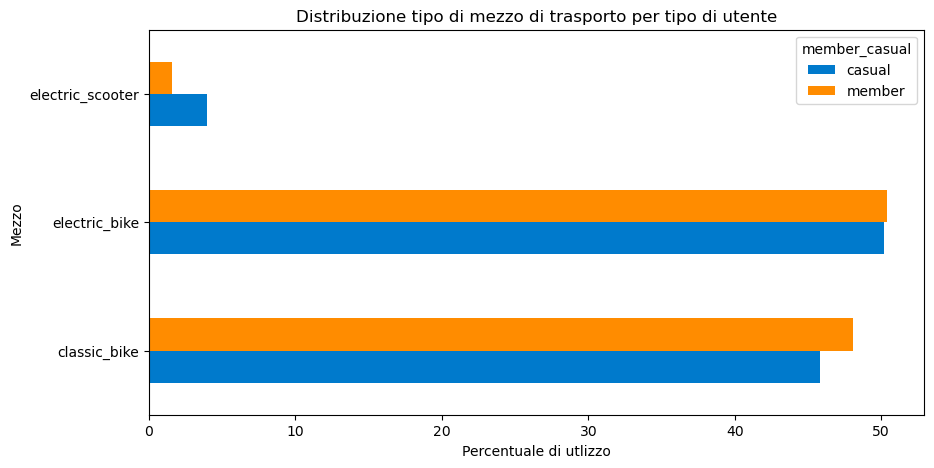

In [36]:
distribuzione_percentuale.plot(
    kind="barh",
    figsize=(10,5),
    color=['#007ACC', '#FF8C00'],
    title="Distribuzione tipo di mezzo di trasporto per tipo di utente"
)

plt.xlabel("Percentuale di utlizzo")
plt.ylabel("Mezzo")

plt.show()

#### 4.3.4 **Analisi durata delle corse per mezzo**

In [37]:
durata_corse_mezzo = divvy.pivot_table(
    values="ride_duration",
    index="rideable_type",
    columns="member_casual",
    aggfunc="median",
    observed=True
)

print(durata_corse_mezzo)

member_casual     casual  member
rideable_type                   
classic_bike        15.0     9.0
electric_bike       10.0     8.0
electric_scooter     8.0     6.0


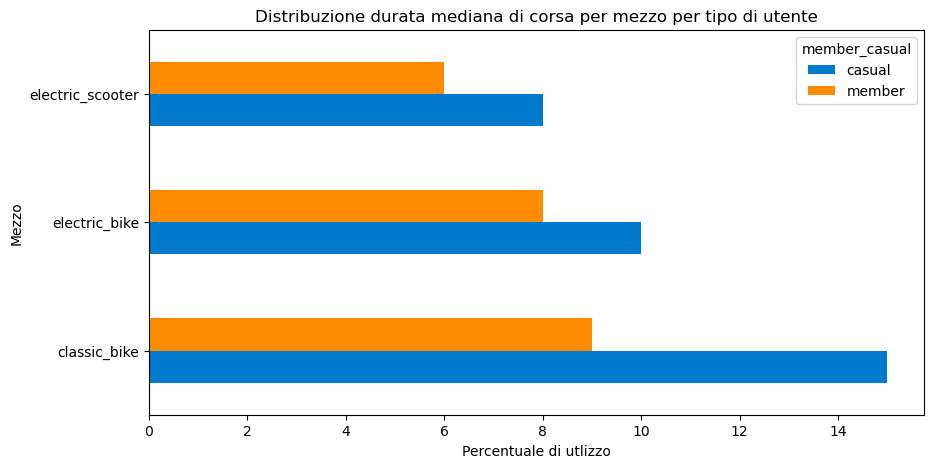

In [38]:
durata_corse_mezzo.plot(
    kind="barh",
    figsize=(10,5),
    color=['#007ACC', '#FF8C00'],
    title="Distribuzione durata mediana di corsa per mezzo per tipo di utente"
)

plt.xlabel("Percentuale di utlizzo")
plt.ylabel("Mezzo")

plt.show()

### 4.4 Analisi sui costi e sul risparmio per i piani abbonamento

#### 4.4.1 **Analisi del Costo per Singola Corsa per gli Utenti Occasionali**


Questo codice calcola il costo medio di un viaggio singolo per un utente occasionale (casual), basandosi sulla durata media della corsa e sulla tariffa "Single Ride" ($1 + $0.19/min).

In [49]:
# Filtra i dati per gli utenti occasionali (casual)
casual_rides = divvy[divvy['member_casual'] == 'casual']

# Calcola la durata media di un viaggio per i casual (in minuti)
media_durata_casual = casual_rides['ride_duration'].median()

# Calcola il costo medio di un singolo viaggio
costo_medio_viaggio = 1 + (0.19 * media_durata_casual)

print(f"La durata media di un viaggio per un utente occasionale è di {media_durata_casual:.2f} minuti.")
print(f"Il costo medio di un singolo viaggio per un utente occasionale è di ${costo_medio_viaggio:.2f}.")

La durata media di un viaggio per un utente occasionale è di 12.00 minuti.
Il costo medio di un singolo viaggio per un utente occasionale è di $3.28.


#### 4.4.2 **Analisi del confronto tra tariffe**

Questo codice identifica il punto di pareggio tra il costo delle corse singole e quello dell'abbonamento annuale promozionale ($99) e mi permette di capire quante corse o giorni di utilizzo sono necessari per rendere l'abbonamento più conveniente.

In [50]:
# Tariffa media di un giorno, basata sulla durata media del viaggio
costo_day_pass = 18.10
abbonamento_annuale = 99  # Costo dell'offerta promozionale

# Calcolo del punto di pareggio per i Day Pass
pareggio_day_pass = abbonamento_annuale / costo_day_pass

# Costo medio per corsa, calcolato sopra
costo_medio_per_corsa = 1 + (0.19 * media_durata_casual)
numero_corse_per_pareggio = abbonamento_annuale / costo_medio_per_corsa

print(f"\nSono necessari {pareggio_day_pass:.2f} 'Day Pass' per raggiungere il costo dell'abbonamento annuale.")
print(f"Sono necessarie circa {int(numero_corse_per_pareggio)} corse singole per raggiungere il costo dell'abbonamento annuale.")


Sono necessari 5.47 'Day Pass' per raggiungere il costo dell'abbonamento annuale.
Sono necessarie circa 30 corse singole per raggiungere il costo dell'abbonamento annuale.


### 4.4.4 **Analisi sul potenziale di risparmio**

In [ ]:
# Costo medio per corsa basato sulla durata mediana delle corse casual nel weekend (14 minuti)
durata_mediana_casual_weekend = 14
costo_medio_corsa_weekend = 1 + (0.19 * durata_mediana_casual_weekend)

# Costi annuali stimati per un utente occasionale che fa corse nel weekend
corse_mediane_mese_weekend = 8 # Ipotesi: 2 corse per 4 weekend al mese
corse_annue_casual = corse_mediane_mese_weekend * 12
costo_annuale_casual = costo_medio_corsa_weekend * corse_annue_casual

# Costo dell'abbonamento annuale promozionale
abbonamento_annuale_promozionale = 99

# Calcolo del risparmio
risparmio_potenziale = costo_annuale_casual - abbonamento_annuale_promozionale
risparmio_percentuale = (risparmio_potenziale / costo_annuale_casual) * 100

print(f"Costo medio di una corsa nel weekend per un utente occasionale: ${costo_medio_corsa_weekend:.2f}")
print(f"Costo totale annuale stimato per un utente occasionale frequente: ${costo_annuale_casual:.2f}")
print(f"Il costo dell'abbonamento annuale è: ${abbonamento_annuale_promozionale:.2f}")
print(f"\nRisparmio potenziale in un anno: ${risparmio_potenziale:.2f}")
print(f"Risparmio percentuale: {risparmio_percentuale:.2f}%")

### Conclusione

Gli insight e le raccomandazioni per il piano marketing continuano [qui]()